In [1]:
import pandas as pd
creditcard = pd.read_csv("C:/Users/jstep/Downloads/creditcard/creditcard.csv")

In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as CM 
from sklearn import model_selection 
from sklearn.model_selection import learning_curve 
from sklearn.metrics import precision_recall_curve 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
# identify outliers
# identify nulls
# address class imbalance with SMOTE/XGB
# tune

In [23]:
creditcard.columns = [c.lower() for c in creditcard.columns]

In [24]:
target = "class"
predictors = [c for c in creditcard.columns if c != "class"]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3C68AFF28>,
      dtype=object)

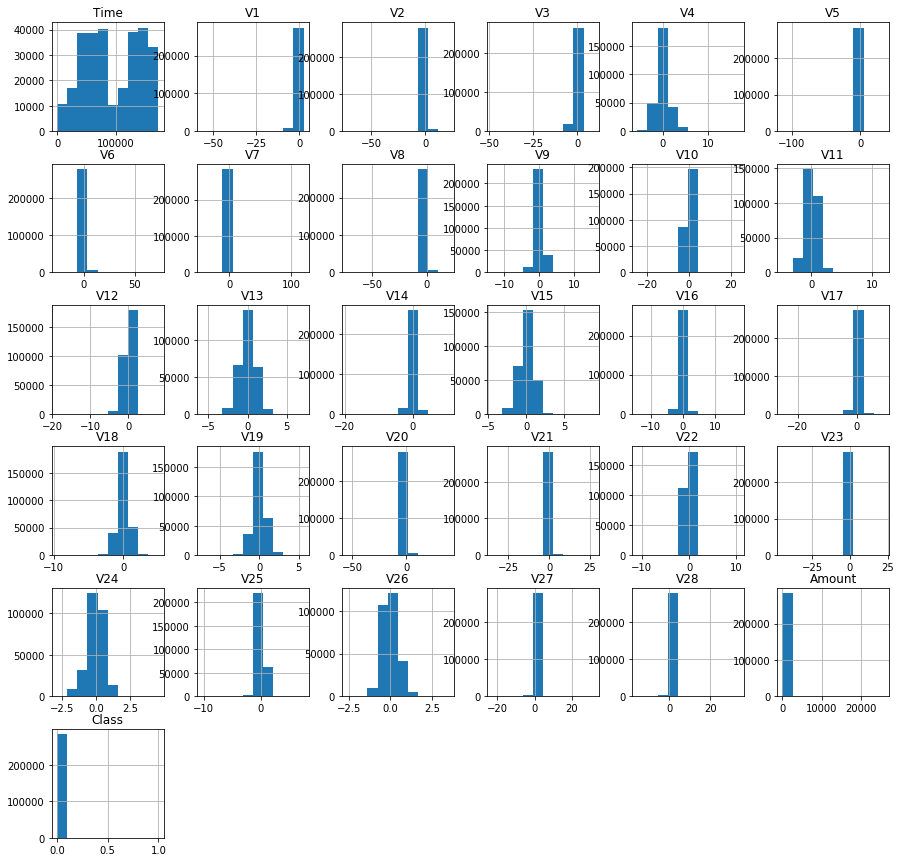

In [13]:
# identify outliers
# plot
# plt.figure(figsize=(20,20))
# creditcard.hist()
# sns.pairplot(creditcard)
creditcard.hist(figsize=(15,15))

In [55]:
limit_dict = {}
for col in creditcard.columns:
    ul = input(f"enter UPPER LIMIT for {col}:")
    if ul == "skip":
        continue
    ll =input(f"enter LOWER LIMIT for {col}:")
    limit_dict[col] = [float(ll), float(ul)]
    

enter UPPER LIMIT for time:skip
enter UPPER LIMIT for v1:100
enter LOWER LIMIT for v1:-12.5
enter UPPER LIMIT for v2:100
enter LOWER LIMIT for v2:-10
enter UPPER LIMIT for v3:100
enter LOWER LIMIT for v3:-10
enter UPPER LIMIT for v4:10
enter LOWER LIMIT for v4:0
enter UPPER LIMIT for v5:100
enter LOWER LIMIT for v5:-10
enter UPPER LIMIT for v6:10
enter LOWER LIMIT for v6:-10
enter UPPER LIMIT for v7:10
enter LOWER LIMIT for v7:-10
enter UPPER LIMIT for v8:100
enter LOWER LIMIT for v8:-10
enter UPPER LIMIT for v9:5
enter LOWER LIMIT for v9:-10
enter UPPER LIMIT for v10:10
enter LOWER LIMIT for v10:-10
enter UPPER LIMIT for v11:5
enter LOWER LIMIT for v11:-10
enter UPPER LIMIT for v12:100
enter LOWER LIMIT for v12:-10
enter UPPER LIMIT for v13:5
enter LOWER LIMIT for v13:-5
enter UPPER LIMIT for v14:10
enter LOWER LIMIT for v14:-10
enter UPPER LIMIT for v15:5
enter LOWER LIMIT for v15:-5
enter UPPER LIMIT for v16:10
enter LOWER LIMIT for v16:-10
enter UPPER LIMIT for v17:100
enter LOWER 

In [61]:
# outlier limits
limit_dict = {'v1': [-12.5, 100.0],
 'v2': [-10.0, 100.0],
 'v3': [-10.0, 100.0],
 'v4': [-10.0, 10.0],
 'v5': [-10.0, 100.0],
 'v6': [-10.0, 10.0],
 'v7': [-10.0, 10.0],
 'v8': [-10.0, 100.0],
 'v9': [-10.0, 5.0],
 'v10': [-10.0, 10.0],
 'v11': [-10.0, 5.0],
 'v12': [-10.0, 100.0],
 'v13': [-5.0, 5.0],
 'v14': [-10.0, 10.0],
 'v15': [-5.0, 5.0],
 'v16': [-10.0, 10.0],
 'v17': [-10.0, 100.0],
 'v18': [-5.0, 100.0],
 'v19': [-5.0, 5.0],
 'v20': [-10.0, 10.0],
 'v21': [-10.0, 10.0],
 'v22': [-5.0, 5.0],
 'v23': [-5.0, 5.0],
 'v24': [-2.5, 2.5],
 'v25': [-5.0, 5.0],
 'v26': [-10.0, 10.0],
 'v27': [-15.0, 15.0],
 'v28': [-10.0, 20.0],
 'amount': [-10.0, 10000.0]}

In [62]:
df = creditcard.copy()
for col in df.columns:
    if col in limit_dict.keys():
        df = df[(df[col] > limit_dict[col][0]) & (df[col] < limit_dict[col][1])]
        print(col)
        print(df.shape)

v1
(284266, 31)
v2
(283854, 31)
v3
(283766, 31)
v4
(283765, 31)
v5
(283684, 31)
v6
(283675, 31)
v7
(283570, 31)
v8
(283071, 31)
v9
(282534, 31)
v10
(282525, 31)
v11
(282474, 31)
v12
(282472, 31)
v13
(282472, 31)
v14
(282443, 31)
v15
(282443, 31)
v16
(282443, 31)
v17
(282420, 31)
v18
(282419, 31)
v19
(282419, 31)
v20
(282418, 31)
v21
(282405, 31)
v22
(282405, 31)
v23
(282139, 31)
v24
(281978, 31)
v25
(281978, 31)
v26
(281978, 31)
v27
(281978, 31)
v28
(281978, 31)
amount
(281978, 31)


In [ ]:
df

In [74]:
predictors = [p for p in predictors if p != "time"]

In [82]:

# from tqdm import tqdm
# k_values = [1, 2, 3, 4, 5, 6, 7]
# for k in tqdm(k_values):

X = df[predictors].values
y = df[target].values

model = XGBClassifier(learning_rate = 0.01, n_estimators=2000, 
                        max_depth=20, objective = "binary:logistic")
over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]

pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores_over = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
print(f"k={k}\n")
print(f"mean recall: {np.mean(scores_over)}\n")
print(scores_over)


NameError: name 'k' is not defined

In [83]:
# scores_over

array([0.75757576, 0.71428571])

In [85]:
# assuming k=5 is good, run a model and check precision/recall curves
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [90]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=0.01,
                               max_delta_step=0, max_depth=20,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=2000,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method=None,
                               validate_parameters=False, verbosity=None))])

RandomUnderSampler(sampling_strategy=0.5)

In [91]:
yhat_test = pipeline.predict(X_test)
yhat_test_proba = pipeline.predict_proba(X_test)[:,1]

In [92]:
confusion_matrix = CM(y_test,yhat_test,np.unique(y_train))

C:\Users\jstep\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [95]:
confusion_matrix

array([[84436,    75],
       [   22,    61]], dtype=int64)

In [94]:
# precision
61/(61+75)

0.4485294117647059

In [96]:
# recall
61/(61+22)

0.7349397590361446

In [104]:
precision_ls, recall_ls, threshold_ls =  precision_recall_curve(y_test,yhat_test_proba)

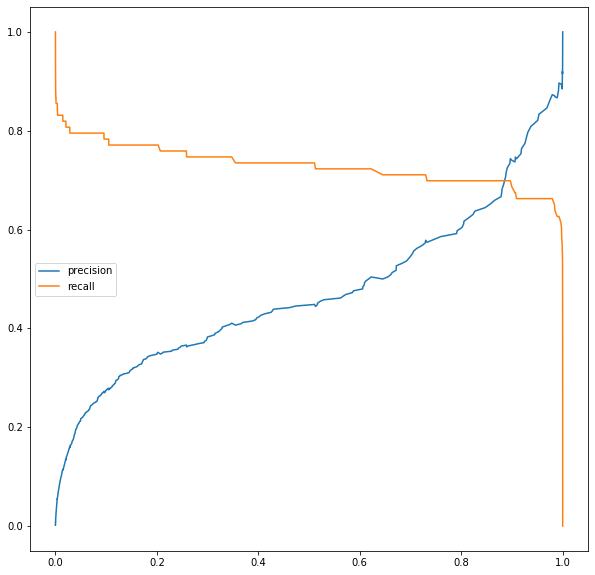

In [105]:
plt.figure(figsize=(10,10))
threshold_ls = np.append(threshold_ls,1)
plt.plot(threshold_ls, precision_ls)
plt.plot(threshold_ls, recall_ls)
plt.legend(["precision","recall"])

In [113]:
CM(y_test,np.where(yhat_test_proba > 0.2,1,0),np.unique(y_train))

C:\Users\jstep\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


array([[84391,   120],
       [   19,    64]], dtype=int64)

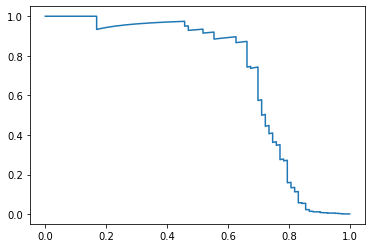

In [119]:
plt.plot(recall_ls,precision_ls)

In [108]:
CM(y_test,yhat_test,np.unique(y_train))

C:\Users\jstep\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


array([[84436,    75],
       [   22,    61]], dtype=int64)

In [40]:
creditcard[creditcard["v8"] < -20 ].shape

(90, 31)

In [43]:
creditcard[creditcard["v8"] > 10 ].shape

(43, 31)

In [117]:
# better to set up a simple manual outlier removal function
np.sum(y_test)/len(y_test)

0.000981157056055985

In [25]:
X_train = creditcard[predictors]

In [35]:
# exclude data greater than 95% percentile
# def outlier_95_removal():
df = creditcard.copy()
for col in df.columns:
    five_percentile = df[col].quantile(0.05)
    ninety_five_percentile = df[col].quantile(0.95)
    print(five_percentile)
    print(ninety_five_percentile)
    df = df[(df[col] > five_percentile) & (df[col] < ninety_five_percentile)]

25297.600000000002
164143.40000000002
-2.9048571926345716
2.08250029817552
-1.721192670029215
1.56936577173314
-1.91070460966546
2.0989091478378
-2.186561091008522
2.2232627972322896
-1.4545079761734998
1.78972719490886
-1.265449453380394
1.3600728529652573
-0.9389587038682218
1.2280806540076599
-0.39209921540031056
0.63196002672285
-1.264410461479432
1.4842003162369959
-1.00079895714217
0.739118304881306
-1.461930410578224
1.5730189007966455
-0.72463340899759
1.25963913543025
-1.6345668172242631
1.270120952628091
-1.052378635844171
0.7578772431105704
-1.0714578450469499
1.37548448592357
-0.9889217880611372
0.8946473241147999
-0.978207002612207
0.4704722005977355
-0.9785060259505498
0.7465847550306267
-0.7533006688868994
0.8404578615538036
-0.25208719229642984
0.2663282589628697
-0.342291609456018
0.24902932706537964
-0.8656511601273232
0.6168517468285004
-0.2272359833273979
0.342026391767715
-0.6420748907029985
0.6954198982887283
-0.5248269738884613
0.6538534529395336
-0.5421298788634

In [34]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
data_dummy = pandas.get_dummies(data[['company_id', 'dept', 'seniority', 'salary', 'early_quitter']], drop_first=True)           
  
#we are not too interested in predictive power, we are mainly using the tree as a descriptive stat tool
tree = DecisionTreeClassifier( max_depth=4, min_samples_leaf = 30, class_weight="balanced", min_impurity_decrease = 0.001)
tree.fit(data_dummy.drop('early_quitter', axis=1), data['early_quitter'])


(0, 31)

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [133]:
tree1 = DecisionTreeClassifier( max_depth=3, min_samples_leaf = 30, class_weight="balanced")
tree1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=30)

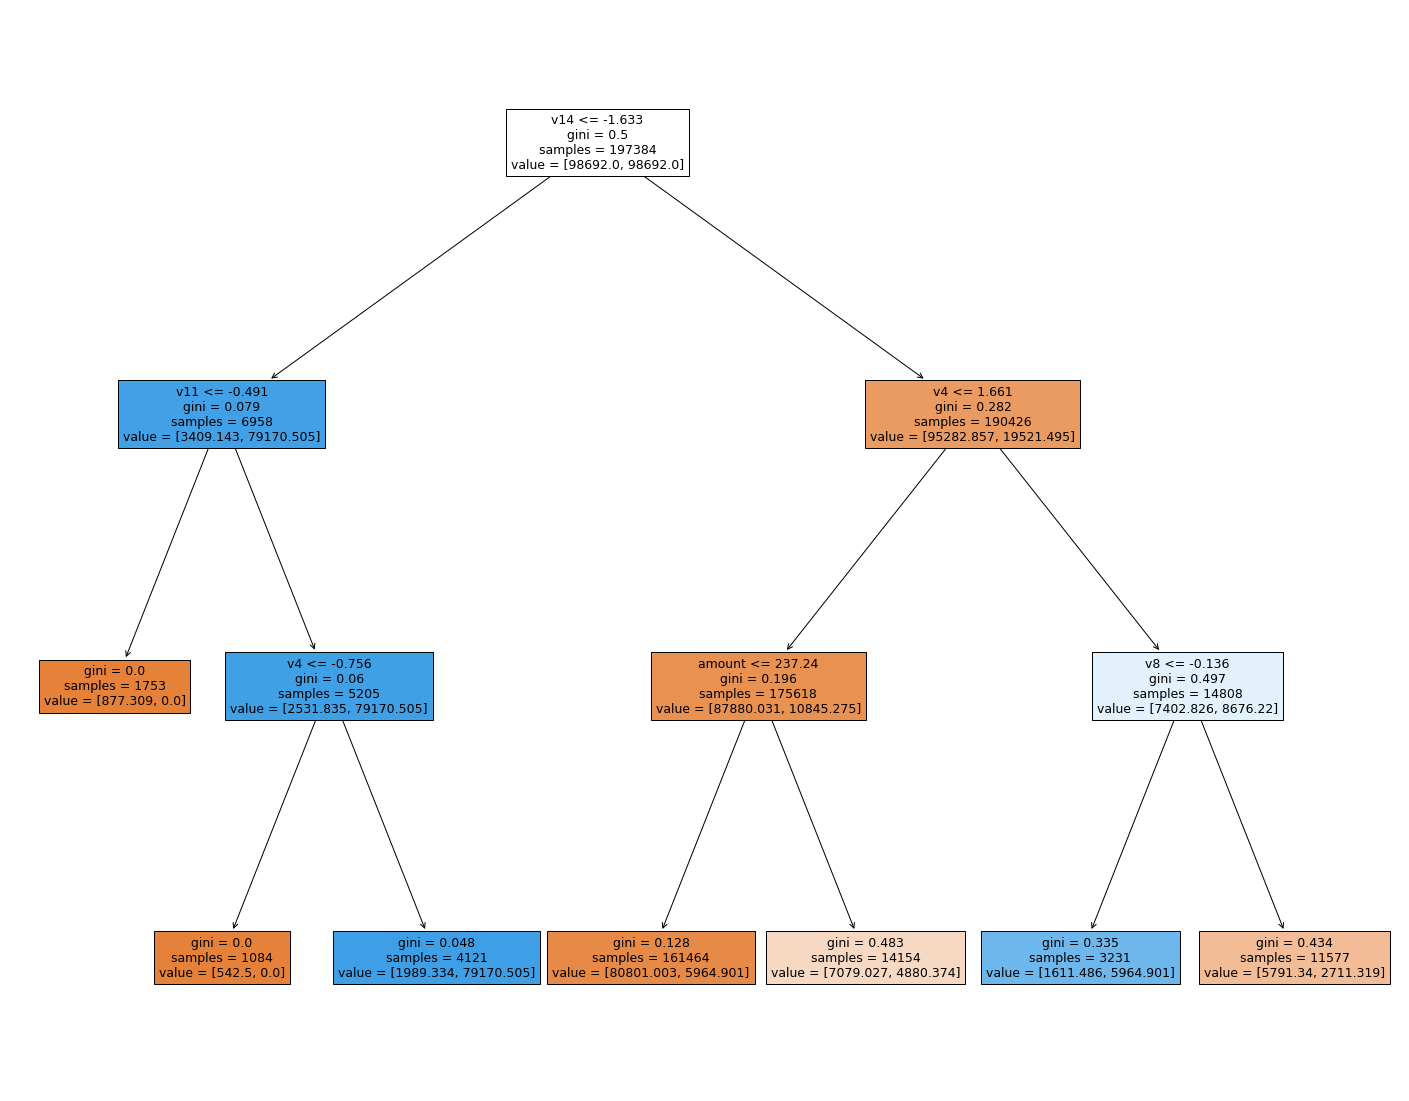

In [134]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(tree1, 
                   feature_names=predictors,  
                   filled=True)
# print(tree.export_text(tree1))

In [148]:
feature_imp_df = pd.DataFrame({"predictor":predictors,"feature_imp":pipeline["model"].feature_importances_})
feature_imp_df.sort_values("feature_imp",ascending=False)

,predictor,feature_imp
13,v14,0.60261
3,v4,0.06609
11,v12,0.03006
28,amount,0.02631
9,v10,0.02120
20,v21,0.01907
27,v28,0.01579
16,v17,0.01515
25,v26,0.01397
2,v3,0.01391


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3DAFF04A8>,
      dtype=object)

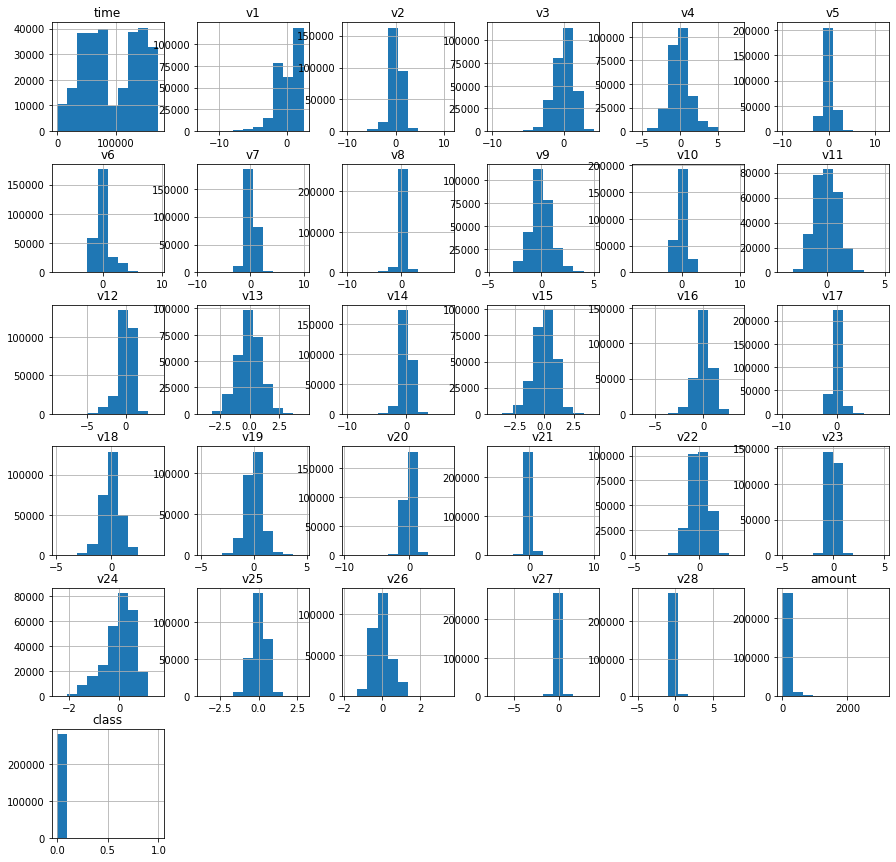

In [72]:
df.hist(figsize=(15,15))